In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader

# Tensors basics

### Methods to construct tensors

#### Long tensors (int/long)

In [ ]:
# Build tensor of type Long
a = torch.tensor([1, 2, 3, 4])  # use integers only
a = torch.tensor([1., 2., 3., 4.], dtype=torch.int64)  # LongTensor with int64
a = torch.tensor([1., 2., 3., 4.], dtype=torch.int32)  # IntTensor with int32

#### Float tensors (float/double)

In [ ]:
# Build float tensors
a = torch.tensor([1, 2, 3], dtype=float)  # DoubleTensor with float64
a = torch.tensor([1, 2, 3], dtype=torch.float64)  # DoubleTensor with float64

a = torch.tensor([1, 2, 3], dtype=torch.float32)  # FloatTensor with float32
b = torch.tensor([1, 2, 3]).float()  # FloatTensor with float32
a = torch.FloatTensor([1, 2, 3])  # FloatTensor with float32

# transform tensor into float
a = a.type(torch.FloatTensor)  # FloatTensor with float32

### Get informations

In [ ]:
# Dimensions
a.shape
a.size()  # idem
a.ndimension()  # rank

# Types
a.type()  # type of Tensor
a.dtype  # type of data within Tensor

### Transformations

#### Transform shape

In [ ]:
# initial shape (3)

# Transform in shape (3, 1)
a.view(3,1).shape
a.view(-1, 1).shape  # Idem

# Transform in shape (1, 3)
a.view(1, 3).shape
a.view(1, -1).shape

#### Transform object type

In [ ]:
# Numpy & Torch
# -------------
numpy_arr = np.array([1, 2, 3])

# Numpy => Torch
tensor = torch.from_numpy(numpy_arr)

# Torch => Numpy
numpy_arr = tensor.numpy()

# ps: these are pointers, any change is 
# repercuted on the other variables

In [ ]:
# Pandas & Torch
# --------------
pd_series = pd.Series([1, 2, 3])

# Pandas => Torch
tensor = torch.from_numpy(pd_series.values)

# Torch => Pandas
pd_series = pd.Series(tensor)

In [ ]:
# Lists & Tensor
# --------------

# List => Tensor
tensor = torch.tensor(dumb_list)

# Tensor => List
dumb_list = tensor.tolist()

### Indexing

In [ ]:
# Multiple indexing
print(tensor)  # (1, 2, 3)
tensor[:2] = torch.tensor([100, 200])  # (100, 200, 3)

### Basic math operations

In [ ]:
# Addition, substraction, etc. are element-wise operations
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
z = a + b

a + 1  # Broadcasting

# Scalar multiplication and division too
a*2
a/2

In [ ]:
# Vector multiplication
a * b  # element-wise
torch.dot(a, b) # Dot product (matrix mult)

In [ ]:
# Mean (must be float)
float_tensor = torch.tensor([1, 2, 3]).float()
float_tensor.mean()

# Max, min
tensor.max()

In [ ]:
# Tensor in radians
tensor_radians = torch.tensor([0, np.pi/2, np.pi])

# Sinus
tensor_radians.sin()

# Generate seq
torch.linspace(-2, 2, steps=5)
print(torch.linspace(-2, 2, steps=4))

### Masks

In [ ]:
# Get indexes for True elements
bool_tensor = torch.tensor([False, False, True, False, True])
bool_tensor.nonzero()

# Optimization basics

### Differenciation

In [ ]:
# Simple derivative
x = torch.tensor(2., requires_grad=True)
y = x**2drop
y.backward()  # compute derivative of y
x.grad  # evaluate the value of x

In [ ]:
# Partial derivatives
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = x * y + x**2
z.backward()
x.grad  # partial derivative of z with regard to x
y.grad  # partial derivative of z with regard to y

In [ ]:
# Tensor properties
x.data
x.grad_fn
x.grad
x.is_leaf
x.requires_grad

# Linear Regression

## Lowest level implementation

### Batch Gradient Descent

In [ ]:
# Set data
x = torch.arange(-3, 3, 0.1).view(-1, 1)
y = (-3 * x) + (3 * np.sin(x)) + (.5 * torch.randn(x.size()))

# Initialize parameters
w = torch.tensor(-10., requires_grad=True)
b = torch.tensor(-1., requires_grad=True)

# Set hyper-parameters
lr = 0.03
n_epochs = 12

In [ ]:
def forward(x):
    return w * x + b

def criterion(y_hat, y):
    return torch.mean((y_hat - y)**2)

list_cost = []
for epoch in range(n_epochs):
    # predict
    y_hat = forward(x)
    
    # compute cost
    loss = criterion(y_hat, y)
    
    # Optimize with batch gradient descent
    loss.backward()  # compute derivatives
    w.data = w.data - lr * w.grad.data  # backpropagate
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()  # reset grad for next iter
    b.grad.data.zero_()
    
    list_cost.append(loss.item())

In [ ]:
plt.plot(x.numpy(), y)  # Plot data
plt.plot(x.numpy(), y_hat.data.numpy())  # Plot estimated line
plt.plot()

In [ ]:
# Plot loss evolution (average cost)
plt.plot(list_cost)
plt.plot()

### Stochastic Gradient Descent

#### With manual batches

In [ ]:
list_cost = []
for epoch in range(n_epochs):
    avg_cost_epoch = 0

    for x_i, y_i in zip(x, y):  # multiple batches
        # predict
        y_hat = forward(x_i)
        
        # compute cost
        loss = criterion(y_hat, y_i)
        
        # Optimize with batch gradient descent
        loss.backward()  # compute derivatives
        w.data = w.data - lr * w.grad.data  # backpropagate
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()  # reset grad for next iter
        b.grad.data.zero_()

        avg_cost_epoch += loss.item()

    list_cost.append(avg_cost_epoch)

#### With DataLoader (enables mini-batch gradient descent)

In [ ]:
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.len = self.x.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

# Instanciate dataset and loader objects
dataset = Dataset(x, y)
trainloader = DataLoader(dataset = dataset, batch_size = 4)

for epoch in range(n_epochs):
    for x_i, y_i in trainloader:  # Train using batches from loader
        y_hat = forward(x_i)
        loss = criterion(y_hat, y_i)
        loss.backward()
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

In [ ]:
plt.plot(list_costb)

## Higer-level implementation

### Built-in model (Linear) and optimizer (SGD)

In [ ]:
from torch.nn import Linear
from torch import nn, optim

# Initialize the linear model
model = Linear(in_features=1, out_features=1) # Slope (w) and bias (b) are randomly initialized
# Inisitalize the SGD optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)

for epoch in range(n_epochs):
    for x_i, y_i in trainloader:
        y_hat = model(x_i)
        loss = criterion(y_hat, y_i)
        optimizer = zero_grad()
        loss.backward()
        optimizer.step()

Model/optimizer parameters' (weights) info

In [ ]:
# Get parameters names and values
print('\n', model.state_dict())

# Get parameters' name only
print(*model.state_dict())
print(model.state_dict().keys())

# Get parameters' values only (+ requires_grad info)
print(list(model.parameters())[0])  # W
print(list(model.parameters())[1])  # bias

# Get parameters' value distinctly
model.state_dict()['linear.weight'].data[0]
model.state_dict()['linear.bias'].data[0]


# Change weights' value
model.state_dict()['linear.weight'][0] = 1.
model.state_dict()['linear.bias'][0] = 0.

#### Customize model (linear)

In [ ]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

# Instanciate model
model = LR(2, 1)
y_hat = model(x)

## Logistic Regression

# Classification

### Lowest level implementation

In [ ]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)  # outputs of linear regression

# Low level usage
sign = nn.Sigmoid()
y_hat = sign(z)

# Higher level
y_hat = torch.sigmoid(z)

plt.plot(z, y_hat)

### Higher level implementation

#### Customize model

In [ ]:
class logistic_regr(nn.Module):
    def __init__(self, in_size, out_size):
        super(logistic_regr, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x

model = logistic_regr(1, 1)
y_hat = model(x)

#### Cross-Entropy loss

In [ ]:
# Self implemented
def criterion(y_hat, y):
    return -1 * torch.mean(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))

# Built-in
criterion = nn.BCELoss()  # for binary classification, input must be shape Nx1

## Softmax

### Lowest level implementation

In [ ]:
# It is exactly the same than a Linear Regression implementation
# Difference: function call with input value out_size > 1.
class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        return self.linear(x)

x = torch.tensor([[1., 3.]])
model = Softmax(2, 3)
z = model(x)
_, y_hat = z.max(1)  # 1 for first dimension (columns)

### Higher level implementation

#### Example with MINST dataset

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch import nn, optim

# Load data
dataset_train = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
dataset_val = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

# Constants
n_class = 10
img_size = 28 * 28
batch_size_train = 100
batch_size_val = 5000
n_epochs = 1
lr = 0.01
n_val = len(dataset_val)

# Instanciation time
model = Softmax(img_size, n_class)
criterion = nn.CrossEntropyLoss()  # input must be shape N (not Nx1)
optimizer = optim.SGD(model.parameters(), lr = lr)
loader_train = torch.utils.data.DataLoader(dataset = dataset_train, batch_size = batch_size_train)
loader_val = torch.utils.data.DataLoader(dataset = dataset_val, batch_size = batch_size_val)

# Training time
accuracy_list = []
for i_epoch in range(n_epochs):
    for i_batch, (x, y) in enumerate(loader_train):
        optimizer.zero_grad()
        z = model(x.view(-1, img_size))
        loss = criterion(z, y)  # z is provided, rather than y_hat
        loss.backward()
        optimizer.step()
        if i_batch % 100 == 0:
            print("Epoch {n_epoch} | batch {n_batch} | loss {loss}".format(n_epoch = i_epoch, n_batch = i_batch, loss = round(loss.item(), 3)))
    
    correct = 0
    for x, y in loader_val:
        z = model(x.view(-1, img_size))
        _, y_hat = torch.max(z.data, 1)
        correct += (y_hat == y).sum().item()

    accuracy = correct / n_val
    accuracy_list.append(accuracy)

In [ ]:
plt.plot(accuracy_list)
#plt.imshow(dataset_train[0][0].view(28, 28))

In [ ]:
model = nn.Sequential(nn.Linear(1,1), nn.Sigmoid())
y_hat = model(x)

## Neural Network

### Lowest level implementation

In [ ]:
# We add "hidden_size" compared to previous models
class Net(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(in_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, out_size)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

torch.manual_seed(0)
model = Net(3, 2, 1)
x = torch.tensor([0., 1., 4.])

y_hat = model(x)

### Higher level implementation

In [ ]:
n_hidden = 2
in_size = 1
out_size = 1

model = torch.nn.Sequential(
    torch.nn.Linear(in_size, n_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(n_hidden, out_size),
    torch.nn.Sigmoid())

X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 1.

Example with MINST dataset

In [ ]:
import torchvision.datasets as dsets
from torch import nn, optim

# Load data
dataset_train = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
dataset_val = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

# Instanciate data loaders
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 2000)
loader_val = torch.utils.data.DataLoader(dataset_val, batch_size = 5000)

criterion = nn.CrossEntropyLoss()
#model ?

## Deep Neural Network

In [ ]:
# Multiple hidden layers built easily
class Net(nn.Module):
    def __init__(self, layers):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList()

        for input_size, output_size in zip(layers, layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    def forward(self, activation):
        for i_layer, linear_transform in enumerate(self.hidden_layers):
            if i_layer < len(self.hidden_layers) - 1:
                activation = torch.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

layers = [2, 3, 4, 3]
model = Net(layers)

## Dropout

In [ ]:
class Net(nn.Module):
    def __init__(self, in_size, h1, h2, h3, out_size, p=0):
        super(Net, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear_in = nn.Linear(in_size, h1)
        self.linear_h1 = nn.Linear(h1, h2)
        self.linear_h2 = nn.Linear(h2, h3)
        self.linear_out = nn.Linear(h3, out_size)

    def forward(self, x):
        x = torch.relu(self.linear_in(x))
        x = self.drop(x)
        x = torch.relu(self.linear_h1(x))
        x = self.drop(x)
        x = torch.relu(self.linear_h2(x))
        x = self.drop(x)
        x = self.linear_out(x)
        return x


## Parameters' Initialization Methods

In [ ]:
# For all methods (but ReLu)
torch.nn.init.xavier_uniform_(linear.weight)
# Initialization for ReLu ("H-e method")
torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')

## Momentum

In [ ]:
optimize = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4)

## Batch Normalization

In [ ]:
class NetBatchNorm(nn.Module):
    def __init__(self, in_size, h_size, out_size):
        super(NetBatchNorm, self).__init__()
        self.linear1 = nn.Linear(in_size, h_size)
        self.linear2 = nn.Linear(h_size, out_size)

        self.batch1 = nn.BatchNorm1d(h_size)

    def forward(self, x):
        x = torch.relu(self.batch1(self.linear1(x)))
        x = self.linear2(x)
        return x

## Convolutions

In [84]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
image = torch.zeros(1, 1, 5, 5)
image[0, 0, :, 2] = 1

# Apply convolution
z = conv(image)

# Apply activation on activ. map
A = torch.relu(z)

tensor([[[[0.0000, 0.0190, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]]]], grad_fn=<ReluBackward0>)

In [ ]:
# Max Pooling
max = torch.nn.MaxPool2d(kernel_size=2, stride=1)

Set weights' value

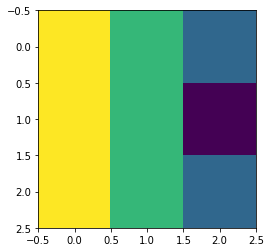

In [88]:
# Instanciate a multiple (3) output convolution layer
conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)

# Set weights' value
Gx = torch.tensor([[1., 0., -1.], [1., 0., -2.], [1., 0., -1.]])
Gy = torch.tensor([[1., 2., -1.], [0., 0., 0.], [-1., -2., -1.]])
conv1.state_dict()['weight'][0][0] = Gx
conv1.state_dict()['weight'][1][0] = Gy
conv1.state_dict()['weight'][2][0] = torch.ones(3, 3)/6
conv1.state_dict()['bias'][:] = torch.tensor([0., 0., 0.])

img1 = torch.zeros(1, 1, 5, 5)
img1[0, 0, :, 2] = 1
z = conv1(img1)

plt.imshow(Gx)

# Other

## Datasets loadable

In [ ]:
torch.manual_seed(0)  # Define parameters' initialization value

In [ ]:
import torchvision.datasets as datasets
dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

## Misclassified samples

In [ ]:
n_misclassified = 0
for i, (x, y) in enumerate(dataset_val):
    z = model(x.reshape(-1, 28 * 28))
    y_hat_proba, y_hat_idx = torch.max(z, 1)
    if y_hat_idx != y:
        #show_data(x)
        print(i)
        n_misclassified += 1
    if n_misclassified >= 5:
        break

In [ ]:
monitor = data_monitoring(db = dataset_val, model = model)
n_misclassified, dic_missclasified = monitor.get_misclassified_samples(sample_size_flatten=784, plot=True, plot_shape=(28, 28))